In [77]:
import datetime as dt
import matplotlib.dates as mdates
from obspy import UTCDateTime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import re
import matplotlib.cm as cm
import matplotlib.colors as cl

In [2]:
starttimes=[]
endtimes=[]
net=[]
nooftimes=input("howmuch?")
nooftimes=int(nooftimes)
while nooftimes !=0:
    starttime=input("start time?")
    endtime=input("endtime time?")
    network=input("Network?")
    startt=UTCDateTime(starttime)
    endt=UTCDateTime(endtime)
    starttimes.append(starttime)
    endtimes.append(endtime)
    net.append(network)
    nooftimes=nooftimes-1
else:
    pass
print("start times are",starttimes)
print("endtimes are",endtimes)

howmuch? 1
start time? 2017-05-15
endtime time? 2021-08-18
Network? AK


start times are ['2017-05-15']
endtimes are ['2021-08-18']


In [3]:
sta=input("Station?")
loc=input("location?")
cha=input("channel?")

Station? L17K
location? *
channel? BHZ


In [ ]:
import requests
for z in range (len(starttimes)):
    url='https://service.iris.edu/mustang/noise-psd/1/query?target='+net[z]+"."+sta+"."+loc+"."+cha+".M&starttime="+str(starttimes[z])+"&endtime="+str(endtimes[z])+"&format=xml"
    print(url)
    resp = requests.get(url)
    with open('pdf'+str(z)+".xml", 'w') as foutput:
        foutput.write(resp.content.decode('utf-8'))

In [ ]:
files=[]
for name in glob.glob('/home/sjohn/spectrogram/*xml'):
    files.append(name)
    print(name)

In [ ]:
os.system('xmlmerge *.xml > combine.xml')

In [4]:
with open('combine.xml') as f:
    lines = f.readlines()  

In [5]:
pattern=re.compile("<Psd target=\"([A-z]*)\.")
pattern1=re.compile("<value freq=\"([1]?[0-9]?\.[\d]+)\"[\s,a-z,=,\-,\"]*([\d]+\.?[\d]+)\"")

In [6]:
counttime=0
for line in lines:
    result=re.finditer(pattern,line)
    for match in result:
        counttime+=1 
print(counttime)

71687


In [7]:
countval=0
co=0
r=-1
ma=np.zeros((96,counttime))
for line in lines:
    result1=re.finditer(pattern1,line)
    for match in result1:
        countval+=1
        if (r+1)/96==1:
            r=0
            co+=1
        else:
            r+=1  
#         print(match.group(2))
        ma[r,co]=(match.group(2))

In [48]:
print(np.shape(ma))
print(np.amin(ma))
np.amax(ma)

(96, 71687)
26.4379173958


187.24417335816719

In [9]:
final=np.delete(ma, range(1, ma.shape[1], 2), axis=1)
print(final)
np.shape(final)

[[ 155.95838846  128.79048846  163.60778846 ...,  166.75849336
   174.14539336  179.23899336]
 [ 156.47143533  129.30353533  164.12083533 ...,  167.59094297
   175.00704297  179.48764297]
 [ 157.34072533  130.74952533  165.65872533 ...,  168.0258308
   175.4419308   179.9225308 ]
 ..., 
 [ 111.54717467  140.73637467  143.05627467 ...,  149.17874489
   149.10434489  148.86214489]
 [  94.67753356  124.24303356  126.59443356 ...,  148.88978589
   148.78658589  148.51798589]
 [  44.3902174    72.6960174    75.0166174  ...,  148.14911874
   147.99411874  147.70041874]]


(96, 35844)

In [10]:
startt=UTCDateTime(starttimes[0])
print(startt)
endt=UTCDateTime(endtimes[-1])
print(endt)
l=((startt-endt)/8)
print(l)
time=np.arange(startt,endt,-l)
print(time)
np.shape(time)

2017-05-15T00:00:00.000000Z
2021-08-18T00:00:00.000000Z
-16804800.0
[UTCDateTime(2017, 5, 15, 0, 0) UTCDateTime(2017, 11, 25, 12, 0)
 UTCDateTime(2018, 6, 8, 0, 0) UTCDateTime(2018, 12, 19, 12, 0)
 UTCDateTime(2019, 7, 2, 0, 0) UTCDateTime(2020, 1, 12, 12, 0)
 UTCDateTime(2020, 7, 25, 0, 0) UTCDateTime(2021, 2, 4, 12, 0)]


(8,)

In [11]:
time_mpl = [t.matplotlib_date for t in time]
time_mpl=[t.strftime('%b, %d,%y') for t in time]

In [12]:
date_format=mdates.DateFormatter('%b, %d,%y')

In [61]:
freq =np.arange(0,19.7,4)

/tmp/ipykernel_28898/3237758258.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(time_mpl)
/tmp/ipykernel_28898/3237758258.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(freq)


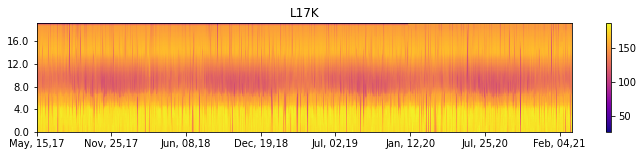

In [80]:
fig, ax1 = plt.subplots(figsize=(12, 2))
#c = ax1.imshow(final, cmap='plasma')
c = ax1.pcolormesh(final,cmap="plasma",vmin=26.43,vmax=187.24)
#fig.set_figwidth(10)
#fig.set_figheight(3)
nom=cl.Normalize(vmin=26.43,vmax=187.24)
ax1.set_xticklabels(time_mpl)
ax1.set_yticklabels(freq)
ax1.title.set_text(sta)
fig.colorbar(cm.ScalarMappable(norm=nom, cmap="plasma"), ax=ax1)
fig.savefig("finalspectro1.png")